# Import lib

In [29]:
import joblib
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.svm import SVC 
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, recall_score, precision_score

import warnings
warnings.filterwarnings("ignore")

# Load dataset

In [30]:
# Load unprocessed data
unprocessed_train_data = pd.read_csv('../dataset/train.csv')
# Load processed data
processed_train_data = pd.read_csv('../dataset/processed_train.csv')
# Load processed data with filled missing values
train_data_filled = pd.read_csv('../dataset/filled_processed_train.csv')
# Load processed data with filled2 missing values
train_data_filled2 = pd.read_csv('../dataset/filled_processed_train2.csv')
# Load processed data with removed missing values
train_data_removed = pd.read_csv('../dataset/removed_processed_train.csv')

In [32]:
unprocessed_train_data = unprocessed_train_data.dropna()
unprocessed_train_data.reset_index(drop=True)
unprocessed_train_data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,...,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000
mean,1238.270718,0.496233,1.522451,0.510799,4.307885,0.520844,32.074335,0.502009,140.263184,4.516323,...,644.800603,1251.115520,2123.632848,12.307885,5.774485,11.001507,0.760924,0.501758,0.505274,1.499247
std,439.641057,0.500111,0.815499,0.500009,4.339735,0.499691,18.138177,0.288622,35.398777,2.291257,...,442.951035,431.924893,1085.051293,4.213061,4.357385,5.464872,0.426626,0.500123,0.500098,1.118539
min,501.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.500000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.500000,875.500000,1207.000000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.000000
50%,1225.000000,0.000000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2147.000000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,2.000000
75%,1615.500000,1.000000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.500000,1633.000000,3065.000000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.000000
max,1998.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [33]:
# Print the shape of the data
unprocessed_train_data.shape, processed_train_data.shape, train_data_filled.shape, train_data_filled2.shape, train_data_removed.shape, 

((1991, 21), (1991, 21), (2000, 73), (2000, 27), (1991, 27))

In [34]:
# Split unprocessed data into X and y
X_unprocessed = unprocessed_train_data.drop('price_range', axis=1)
y_unprocessed = unprocessed_train_data['price_range']
# Split processed data into X and y
X_processed = processed_train_data.drop('price_range', axis=1)
y_processed = processed_train_data['price_range']
# Split processed data with filled missing values into X and y
X_filled = train_data_filled.drop('price_range', axis=1)
y_filled = train_data_filled['price_range']
# Split processed data with filled2 missing values into X and y
X_filled2 = train_data_filled2.drop('price_range', axis=1)
y_filled2 = train_data_filled2['price_range']
# Split processed data with removed missing values into X and y
X_removed = train_data_removed.drop('price_range', axis=1)
y_removed = train_data_removed['price_range']

In [35]:
# Split the unprocessed data into train and test sets
X_train_unprocessed, X_test_unprocessed, y_train_unprocessed, y_test_unprocessed = train_test_split(X_unprocessed, y_unprocessed, test_size=0.1, random_state=42)
# Split the processed data into train and test sets
X_train_processed, X_test_processed, y_train_processed, y_test_processed = train_test_split(X_processed, y_processed, test_size=0.1, random_state=42)
# Split the processed data with filled missing values into train and test sets
X_train_filled, X_test_filled, y_train_filled, y_test_filled = train_test_split(X_filled, y_filled, test_size=0.1, random_state=42)
# Split the processed data with filled2 missing values into train and test sets
X_train_filled2, X_test_filled2, y_train_filled2, y_test_filled2 = train_test_split(X_filled2, y_filled2, test_size=0.1, random_state=42)
# Split the processed data with removed missing values into train and test sets
X_train_removed, X_test_removed, y_train_removed, y_test_removed = train_test_split(X_removed, y_removed, test_size=0.1, random_state=42)
# Print the shapes of the train and test sets
print("Train_unprocessed set shape:", X_train_unprocessed.shape, y_train_unprocessed.shape)
print("Train_processed set shape:", X_train_processed.shape, y_train_processed.shape)
print("Train_filled set shape:", X_train_filled.shape, y_train_filled.shape)
print("Train_filled2 set shape:", X_train_filled2.shape, y_train_filled2.shape)
print("Train_removed set shape:", X_train_removed.shape, y_train_removed.shape)

Train_unprocessed set shape: (1791, 20) (1791,)
Train_processed set shape: (1791, 20) (1791,)
Train_filled set shape: (1800, 72) (1800,)
Train_filled2 set shape: (1800, 26) (1800,)
Train_removed set shape: (1791, 26) (1791,)


# Evaluate Models

In [126]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    print("F1 Score: ", f1_score(y_test, y_pred, average='weighted'))
    print("Recall: ", recall_score(y_test, y_pred, average='weighted'))
    print("Precision: ", precision_score(y_test, y_pred, average='weighted'))
    print("Classification Report: \n", classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()
    return accuracy_score(y_test, y_pred)

# Decision Tree

In [127]:
# Define the Decision Tree Classifier model
dtc = DecisionTreeClassifier(random_state=42)
# Fit the model
dtc.fit(X_train_filled2, y_train_filled2)

DecisionTreeClassifier(random_state=42)

Accuracy:  0.845
F1 Score:  0.8456742835541685
Recall:  0.845
Precision:  0.8476212359069502
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.92      0.95        59
           1       0.85      0.90      0.87        49
           2       0.73      0.71      0.72        45
           3       0.80      0.83      0.81        47

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.85      0.84      0.85       200



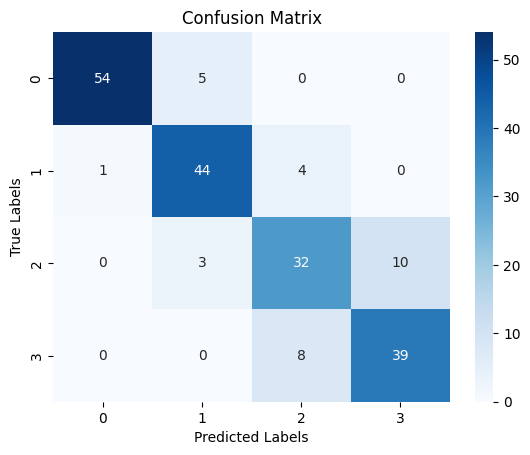

In [128]:
dt_acc = evaluate_model(dtc, X_test_filled2, y_test_filled2)

## Decision Tree Optimization

In [130]:
# Define the decision tree classifier with default parameters
dt = DecisionTreeClassifier(random_state=42)

# Define the parameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Instantiate the grid search with cross-validation
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train_filled2, y_train_filled2)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_dt_classifier = grid_search.best_estimator_
print("Done")

Done


Accuracy:  0.865
F1 Score:  0.8654145246058289
Recall:  0.865
Precision:  0.8666469139846962
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.92      0.92        59
           1       0.84      0.88      0.86        49
           2       0.79      0.82      0.80        45
           3       0.89      0.83      0.86        47

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.87      0.86      0.87       200



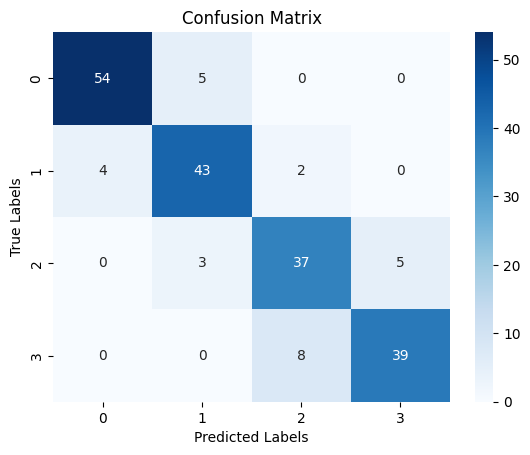

In [131]:
opt_dt_acc = evaluate_model(best_dt_classifier, X_test_filled2, y_test_filled2)

# Random Forest

In [133]:
# Define the random forest classifier with default parameters
rf_classifier = RandomForestClassifier(random_state=42)
# Fit the random forest classifier to the data
rf_classifier.fit(X_train_filled2, y_train_filled2)

RandomForestClassifier(random_state=42)

Accuracy:  0.855
F1 Score:  0.8553153280542987
Recall:  0.855
Precision:  0.8594019607843137
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        59
           1       0.88      0.76      0.81        49
           2       0.73      0.82      0.77        45
           3       0.87      0.87      0.87        47

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.86      0.85      0.86       200



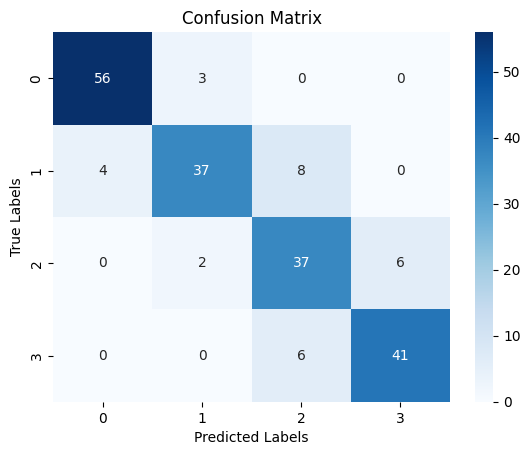

In [134]:
rf_acc = evaluate_model(rf_classifier, X_test_filled2, y_test_filled2)

## Random Forest Optimization

In [43]:
# Define the hyperparameters grid
param_grid = {
    'n_estimators': [50, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20],       # Maximum depth of the trees
    'min_samples_split': [2, 4, 11],   # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 3, 5],      # Minimum number of samples required at each leaf node
    'max_features': ['auto', 'sqrt'],  # Number of features to consider at each split
}

# Instantiate the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Grid search cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_filled2, y_train_filled2)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_rf_classifier = grid_search.best_estimator_
print("Done")

Done


Accuracy:  0.875
F1 Score:  0.8750458234082926
Recall:  0.875
Precision:  0.8769822201607915
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        59
           1       0.89      0.80      0.84        49
           2       0.78      0.84      0.81        45
           3       0.89      0.89      0.89        47

    accuracy                           0.88       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.88      0.88      0.88       200



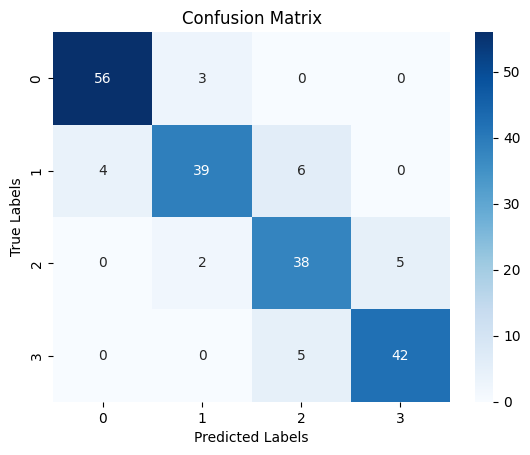

In [135]:
opt_rf_acc = evaluate_model(best_rf_classifier, X_test_filled2, y_test_filled2)

# SVM

In [45]:
# Create a Support Vector Machine classifier
svm = SVC(kernel = 'linear',random_state = 0)
# Fit the model to the train data  
svm.fit(X_train_filled2,y_train_filled2) 

SVC(kernel='linear', random_state=0)

Accuracy:  0.985
F1 Score:  0.9850038850038851
Recall:  0.985
Precision:  0.9850999999999999
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        59
           1       0.98      1.00      0.99        49
           2       0.98      0.98      0.98        45
           3       0.98      0.98      0.98        47

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.99      0.98      0.99       200



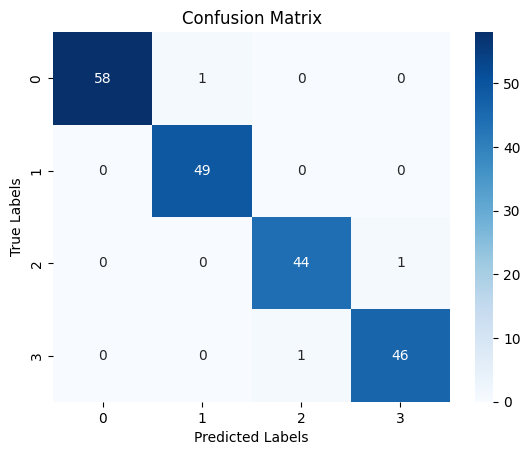

In [137]:
svm_acc = evaluate_model(svm, X_test_filled2, y_test_filled2)

In [ ]:
# Save the trained model to a file
joblib.dump(svm, 'svm_model.pkl')

## SVM Optimization

In [47]:
# Define the hyperparameters grid
param_grid = {
    'C': [0.1, 1, 10, 100],            # Regularization parameter
    'kernel': ['linear', 'rbf'],       # Kernel type
    'gamma': ['scale', 'auto']         # Kernel coefficient for 'rbf' kernel
}

# Create a Support Vector Machine classifier
svm2 = SVC(random_state=0)

# Grid search cross-validation
grid_search = GridSearchCV(estimator=svm2, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_filled2, y_train_filled2)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_svm_classifier = grid_search.best_estimator_
print("Done")

Done


Accuracy:  0.985
F1 Score:  0.9850038850038851
Recall:  0.985
Precision:  0.9850999999999999
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        59
           1       0.98      1.00      0.99        49
           2       0.98      0.98      0.98        45
           3       0.98      0.98      0.98        47

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.99      0.98      0.99       200



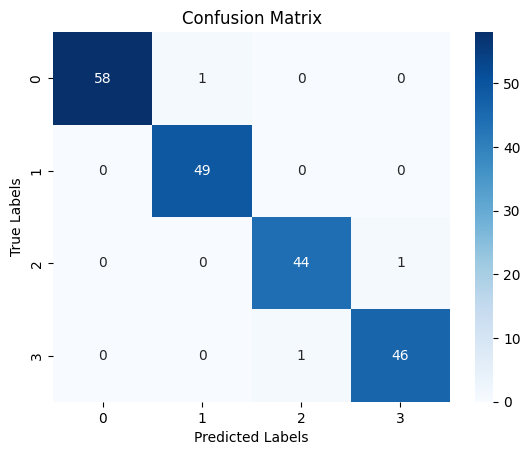

In [138]:
opt_svm_acc = evaluate_model(best_svm_classifier, X_test_filled2, y_test_filled2)

In [154]:
# Save the trained model to a file
joblib.dump(best_svm_classifier, 'opt_svm_model.pkl')

['opt_svm_model.pkl']

# Logistic Regression

In [141]:
# Creating a logistic regression model
lr = LogisticRegression(multi_class = 'multinomial', solver = 'sag', max_iter=1000, penalty='l2', C=0.1, random_state=42)
# Training the model
lr.fit(X_train_filled2, y_train_filled2)

LogisticRegression(C=0.1, max_iter=1000, multi_class='multinomial',
                   random_state=42, solver='sag')

Accuracy:  0.945
F1 Score:  0.9444807475473789
Recall:  0.945
Precision:  0.944452845673153
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        59
           1       0.94      0.92      0.93        49
           2       0.91      0.87      0.89        45
           3       0.94      0.98      0.96        47

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200



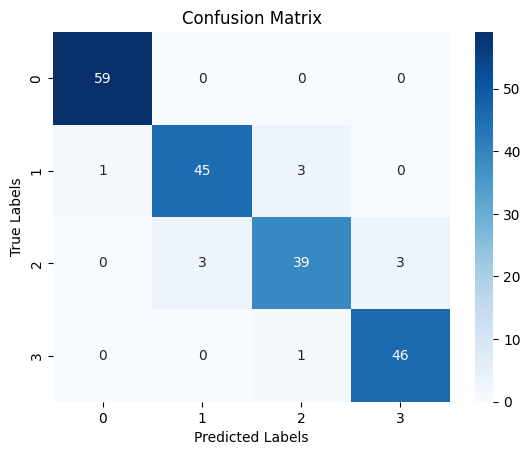

In [142]:
lr_acc = evaluate_model(lr, X_test_filled2, y_test_filled)

## Logistic Regression Optimization

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid
param_grid = {
    'multi_class': ['ovr', 'multinomial'],  # Strategy for multi-class classification
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],  # Optimization algorithm
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2']  # Regularization type
}

# Create a logistic regression model
lr = LogisticRegression(max_iter=1000, random_state=42)

# Grid search cross-validation
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_filled2, y_train_filled2)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_lr_classifier = grid_search.best_estimator_
print("Done")

Done


Accuracy:  0.99
F1 Score:  0.99
Recall:  0.99
Precision:  0.99
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        49
           2       0.98      0.98      0.98        45
           3       0.98      0.98      0.98        47

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



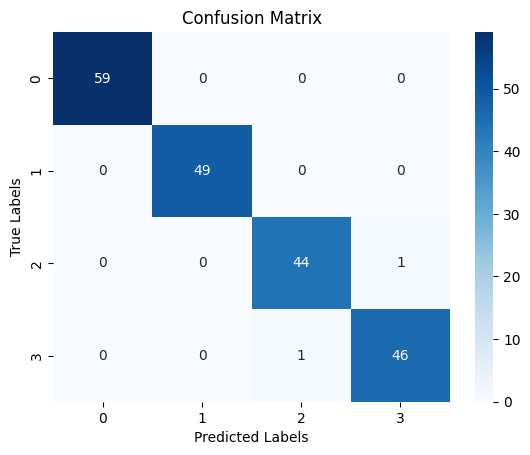

In [143]:
opt_lr_acc = evaluate_model(best_lr_classifier, X_test_filled2, y_test_filled2)

In [53]:
# Save the trained model to a file
joblib.dump(best_lr_classifier, 'opt_lr_model.pkl')

['opt_lr_model.pkl']

# Neural Network

In [121]:
class NN():

    def __init__(self, l2_penalty=0.01):
        self.model = keras.Sequential([
            keras.layers.Flatten(input_shape=(26,)),
            keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(l2_penalty)),
            keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(l2_penalty)),
            keras.layers.Dense(4, activation='softmax')
        ])

        self.callbacks = [
            keras.callbacks.EarlyStopping(patience=20,monitor='val_loss', restore_best_weights=True),
            keras.callbacks.ModelCheckpoint(filepath='model.h5', verbose=1, save_best_only=True),
        ]

        self.opt = keras.optimizers.Adam(learning_rate=1e-4)

        self.model.compile(optimizer=self.opt,
                           loss='sparse_categorical_crossentropy',
                           metrics=['accuracy'],
                           )

    def tf_dataset(self, x, y, batch=16):
        dataset = tf.data.Dataset.from_tensor_slices((x, y))
        dataset = dataset.batch(batch)
        dataset = dataset.prefetch(tf.data.AUTOTUNE)
        return dataset

    def train(self, X_train, y_train, X_val, y_val, epochs=50):
        train_dataset = self.tf_dataset(X_train, y_train)
        val_dataset = self.tf_dataset(X_val, y_val)
        
        self.model.fit(train_dataset, epochs=epochs, validation_data=val_dataset, callbacks=self.callbacks)

    def evaluate(self, X_test, y_test):
        test_dataset = self.tf_dataset(X_test, y_test)
        test_loss, test_acc = self.model.evaluate(test_dataset)
        print('Test accuracy:', test_acc)
        print('Test loss:', test_loss)
        return test_acc
    
    def load_model(self, path):
        self.model = keras.models.load_model(path)
    
    def predict(self, X):
        return self.model.predict(X)

In [124]:
model = NN()
model.train(X_train_filled2, y_train_filled2, X_test_filled2, y_test_filled2, epochs=150)

Epoch 1/150
 94/113 [=======================>......] - ETA: 0s - loss: 3.0401 - accuracy: 0.3185
Epoch 1: val_loss improved from inf to 2.90035, saving model to model.h5
113/113 [==============================] - 1s 2ms/step - loss: 3.0216 - accuracy: 0.3317 - val_loss: 2.9004 - val_accuracy: 0.4150
Epoch 2/150
 88/113 [======================>.......] - ETA: 0s - loss: 2.8080 - accuracy: 0.4688
Epoch 2: val_loss improved from 2.90035 to 2.68244, saving model to model.h5
113/113 [==============================] - 0s 2ms/step - loss: 2.7868 - accuracy: 0.4728 - val_loss: 2.6824 - val_accuracy: 0.5150
Epoch 3/150
 95/113 [========================>.....] - ETA: 0s - loss: 2.5821 - accuracy: 0.5763
Epoch 3: val_loss improved from 2.68244 to 2.46699, saving model to model.h5
113/113 [==============================] - 0s 2ms/step - loss: 2.5688 - accuracy: 0.5733 - val_loss: 2.4670 - val_accuracy: 0.5550
Epoch 4/150
101/113 [=========================>....] - ETA: 0s - loss: 2.3616 - accuracy:

### We can train more epoch to get better loss but it wont give such value

In [125]:
# model.load_model('model.h5')
nn_acc = model.evaluate(X_test_filled2, y_test_filled2)

13/13 [==============================] - 0s 2ms/step - loss: 0.2171 - accuracy: 0.9850
Test accuracy: 0.9850000143051147
Test loss: 0.2171352505683899


# Compare models

In [152]:
def plot_accuracies(accs, labels):
    plt.figure(figsize=(15, 8))
    plt.bar(labels, accs, color='skyblue')
    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.title('Model Accuracies')
    plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
    plt.tight_layout()  # Adjust layout to prevent overlapping labels
    plt.show()

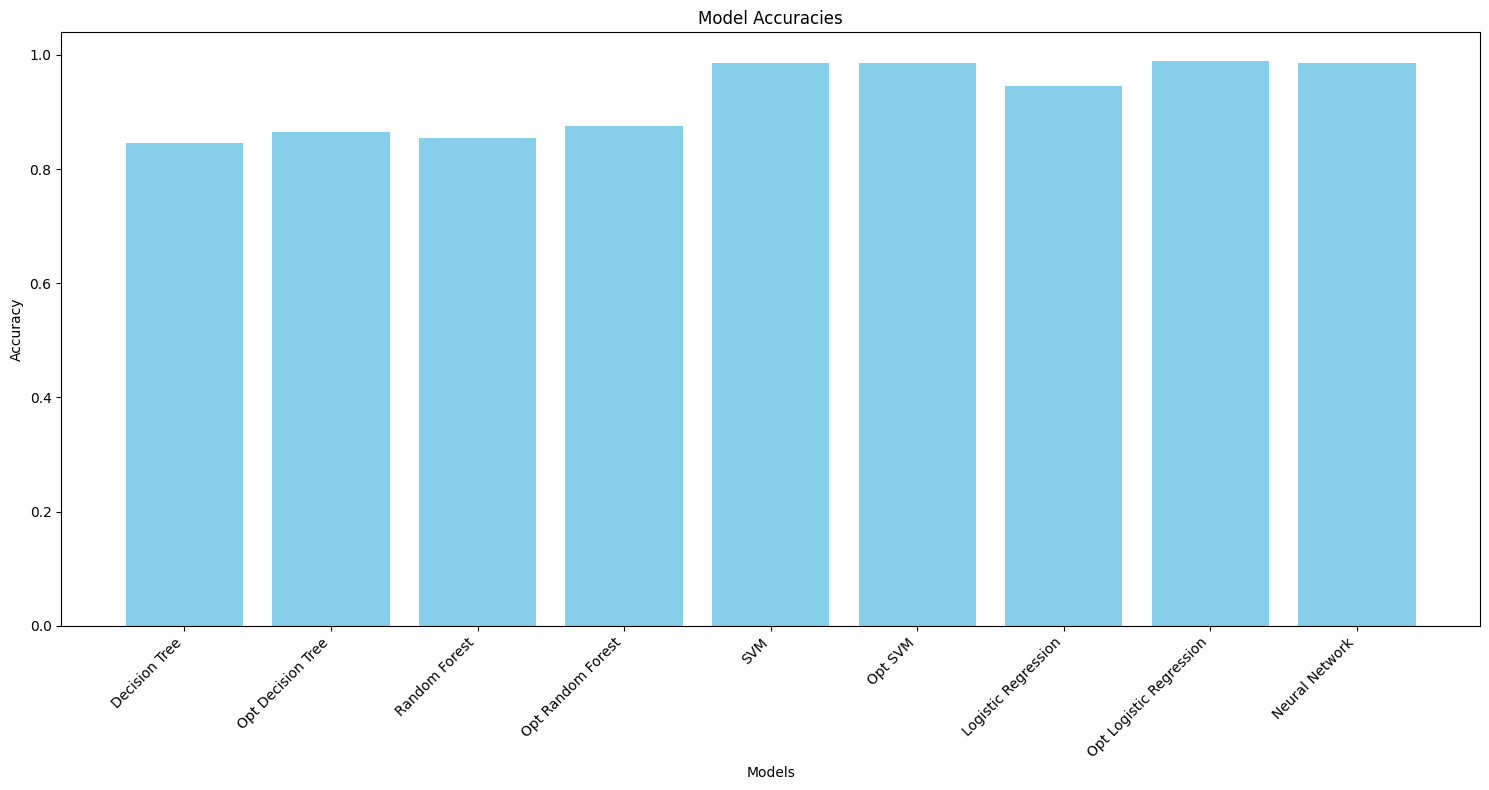

In [153]:
accs = [dt_acc, opt_dt_acc, rf_acc, opt_rf_acc, svm_acc, opt_svm_acc, lr_acc, opt_lr_acc, nn_acc]
labels = ['Decision Tree', 'Opt Decision Tree', 'Random Forest', 'Opt Random Forest', 'SVM', 'Opt SVM', 'Logistic Regression', 'Opt Logistic Regression', 'Neural Network']
plot_accuracies(accs, labels)

### As shown in the plot above the top 4 Models were:
1. Neural Network (99%)
2. Optimized Logistic Regression (99%)
3. Optimized SVM (98%)
4. SVM (98%)
- This is due to their Simplicity and Generalization on data